In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('./softmax_mnist_saved_model/softmax_mnist.meta')
new_saver.restore(sess, './softmax_mnist_saved_model/softmax_mnist')
tf.get_default_graph().as_graph_def()
x = sess.graph.get_tensor_by_name("input:0")
print('x shape:', x.shape)
y_conv = sess.graph.get_tensor_by_name("output:0")
image_b = mnist.test.images[100]
image_b = np.reshape(image_b, (1, 28, 28, -1))
print('image_b shape:', image_b.shape)
result = sess.run(y_conv, feed_dict={x:image_b})
print(result)
print(sess.run(tf.argmax(result, 1)))

INFO:tensorflow:Restoring parameters from ./softmax_mnist_saved_model/softmax_mnist
x shape: (?, 28, 28, 1)
image_b shape: (1, 28, 28, 1)
[[1.3369905e-04 6.2434044e-04 4.0359318e-02 5.1191024e-04 4.0140733e-04
  8.6302432e-05 9.5702440e-01 7.1582646e-05 7.0254336e-04 8.4566309e-05]]
[6]


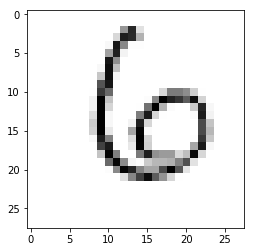

In [14]:
plt.imshow(image_b.reshape([28, 28]), cmap='Greys')
plt.show()